<h1> Belajar Pengembangan Machine Learning </h1>
<h3> Proyek Akhir : Image Classification Model Deployment </h3>

Nama : Fatihah Rahmadayana

Dataset Source : https://www.kaggle.com/alxmamaev/flowers-recognition

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
from shutil import copyfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
dataset_path = "/content/drive/My Drive/data/flowers.zip"
zip_file = zipfile.ZipFile(dataset_path, 'r')
zip_file.extractall("./tmp/")
zip_file.close()

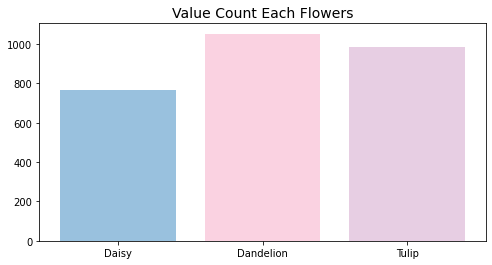

In [3]:
length = [len(os.listdir('./tmp/flowers/daisy')),
         len(os.listdir('./tmp/flowers/dandelion')),                  
         len(os.listdir('./tmp/flowers/tulip'))]

fig = plt.figure(figsize=(8,4))
plt.bar(['Daisy','Dandelion','Tulip'], length, color=['#99c1de','#fad2e1','#e7cee3'])
plt.title('Value Count Each Flowers', size=14)
plt.show()

In [4]:
os.mkdir('./tmp/training/')
os.mkdir('./tmp/testing/')

os.mkdir('./tmp/training/daisy/')
os.mkdir('./tmp/training/dandelion/')
os.mkdir('./tmp/training/tulip/')

os.mkdir('./tmp/testing/daisy/')
os.mkdir('./tmp/testing/dandelion/')
os.mkdir('./tmp/testing/tulip/')

DAISY_SOURCE_PATH = "./tmp/flowers/daisy/"
DAISY_TRAINING_PATH = "./tmp/training/daisy/"
DAISY_TESTING_PATH = "./tmp/testing/daisy/"

DANDELION_SOURCE_PATH = "./tmp/flowers/dandelion/"
DANDELION_TRAINING_PATH = "./tmp/training/dandelion/"
DANDELION_TESTING_PATH = "./tmp/testing/dandelion/"

TULIP_SOURCE_PATH = "./tmp/flowers/tulip/"
TULIP_TRAINING_PATH = "./tmp/training/tulip/"
TULIP_TESTING_PATH = "./tmp/testing/tulip/"

In [5]:
def splitter(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    
    list_files = []
    files = os.listdir(SOURCE)

    for file_name in files:
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            list_files.append(file_name)        
    
    shuffled = random.sample(list_files, len(list_files))  
    idx = int(len(list_files) * SPLIT_SIZE)

    train_set = shuffled[:idx]  
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)

    test_set = shuffled[idx:]    
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

In [6]:
SPLIT_SIZE = .8
splitter(DAISY_SOURCE_PATH, DAISY_TRAINING_PATH, DAISY_TESTING_PATH, SPLIT_SIZE)
splitter(DANDELION_SOURCE_PATH, DANDELION_TRAINING_PATH, DANDELION_TESTING_PATH, SPLIT_SIZE)
splitter(TULIP_SOURCE_PATH, TULIP_TRAINING_PATH, TULIP_TESTING_PATH, SPLIT_SIZE)

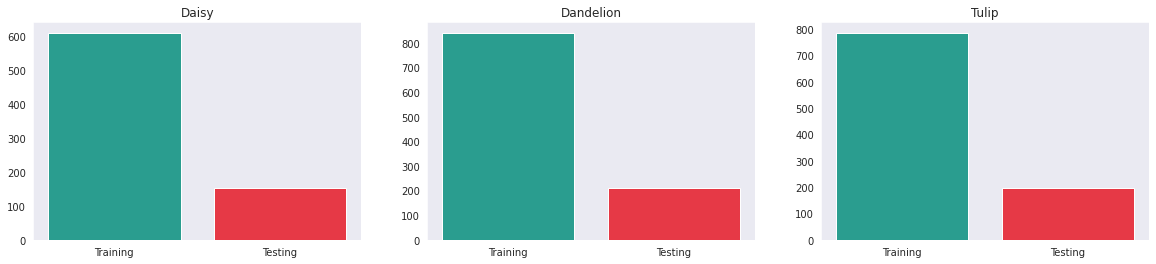

In [7]:
training = [len(os.listdir("./tmp/training/daisy/")),
            len(os.listdir("./tmp/training/dandelion/")),          
            len(os.listdir("./tmp/training/tulip/"))]

testing = [len(os.listdir('./tmp/testing/daisy/')),
           len(os.listdir('./tmp/testing/dandelion/')),       
           len(os.listdir('./tmp/testing/tulip/'))]

sns.set_style('dark')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)

ax1.set_title('Daisy')
ax1.bar(['Training','Testing'], [training[0], testing[0]], color=['#2a9d8f','#e63946'])

ax2.set_title('Dandelion')
ax2.bar(['Training','Testing'], [training[1], testing[1]], color=['#2a9d8f','#e63946'])

ax3.set_title('Tulip')
ax3.bar(['Training','Testing'], [training[2], testing[2]], color=['#2a9d8f','#e63946'])

plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [9]:
TRAINING_DIR = './tmp/training/'
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip = True, shear_range = 0.2,
                                   zoom_range = 0.2, fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=10,
    class_mode='categorical',
    target_size=(150, 150)
)

VALIDATION_DIR = './tmp/testing/' 
test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, shear_range = 0.2,
                                   zoom_range = 0.2, fill_mode = 'nearest')

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=10,
    class_mode='categorical',
    target_size=(150, 150)
)

Found 2239 images belonging to 3 classes.
Found 561 images belonging to 3 classes.


In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.83):
      print("\nReached 95.0% accuracy so cancelling training!")
      self.model.stop_training = True  
callbacks = myCallback()

In [11]:
model.fit(train_generator, epochs = 100, steps_per_epoch=150, validation_data=validation_generator, verbose=1, callbacks=[callbacks])

Epoch 1/100
150/150 [==============================] - 37s 240ms/step - loss: 0.5600 - accuracy: 0.5510 - val_loss: 0.4460 - val_accuracy: 0.6774
Epoch 2/100
150/150 [==============================] - 36s 237ms/step - loss: 0.4450 - accuracy: 0.6805 - val_loss: 0.3676 - val_accuracy: 0.7576
Epoch 3/100
150/150 [==============================] - 36s 238ms/step - loss: 0.3878 - accuracy: 0.7413 - val_loss: 0.3476 - val_accuracy: 0.7772
Epoch 4/100
150/150 [==============================] - 36s 237ms/step - loss: 0.3643 - accuracy: 0.7613 - val_loss: 0.3603 - val_accuracy: 0.7647
Epoch 5/100
150/150 [==============================] - 35s 230ms/step - loss: 0.3358 - accuracy: 0.7892 - val_loss: 0.3388 - val_accuracy: 0.7772
Epoch 6/100
150/150 [==============================] - 35s 231ms/step - loss: 0.3341 - accuracy: 0.7852 - val_loss: 0.3309 - val_accuracy: 0.7879
Epoch 7/100
150/150 [==============================] - 37s 248ms/step - loss: 0.3285 - accuracy: 0.7893 - val_loss: 0.3685 -

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpq78zrwvm/assets


In [13]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)